In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os, random
from pathlib import Path
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
sns.set_style("darkgrid")

orig = pd.read_parquet("/Users/lselig/selig-fa/finance/.data/evs_ratios.parquet")
print(orig.shape)
for c in orig:
    print(c)
meta = pd.read_parquet("/Users/lselig/selig-fa/finance/.data/meta_data.parquet")
features = pd.read_parquet("/Users/lselig/selig-fa/finance/.data/evs_ratios_preprocessed.parquet")
features = features.drop(columns = ["marketCapitalization"])
print(features.shape)
labels = np.log10(meta.stockPrice.values)
# labels = meta.stockPrice.values



(182752, 82)
symbol
date
stockPrice
numberOfShares
marketCapitalization
minusCashAndCashEquivalents
addTotalDebt
enterpriseValue
quarter
currentRatio
quickRatio
cashRatio
daysOfSalesOutstanding
daysOfInventoryOutstanding
operatingCycle
daysOfPayablesOutstanding
cashConversionCycle
grossProfitMargin
operatingProfitMargin
pretaxProfitMargin
netProfitMargin
effectiveTaxRate
returnOnAssets
returnOnEquity
returnOnCapitalEmployed
netIncomePerEBT
ebtPerEbit
ebitPerRevenue
debtRatio
debtEquityRatio
longTermDebtToCapitalization
totalDebtToCapitalization
interestCoverage
cashFlowToDebtRatio
companyEquityMultiplier
receivablesTurnover
payablesTurnover
inventoryTurnover
fixedAssetTurnover
assetTurnover
operatingCashFlowPerShare
freeCashFlowPerShare
cashPerShare
payoutRatio
operatingCashFlowSalesRatio
freeCashFlowOperatingCashFlowRatio
cashFlowCoverageRatios
shortTermCoverageRatios
capitalExpenditureCoverageRatio
dividendPaidAndCapexCoverageRatio
dividendPayoutRatio
priceBookValueRatio
priceToBookR

In [23]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = y_train.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(X_train)
scaler_y.fit(y_train)

X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train)
X_test = scaler_X.transform(X_test)

(73413, 203) (31464, 203) (73413,) (31464,)


In [24]:
model = Ridge()
cv = 10
alphas_ = [10 ** i for i in range(-5, 5)]
print(alphas_)
param_grid = {"alpha": alphas_}
search = GridSearchCV(model, param_grid, scoring = "r2", n_jobs = -1, cv=cv, verbose = 3)
result = search.fit(X_train, y_train)
alpha_opt = search.best_params_["alpha"]

print(f"{alpha_opt = }")
print(f"{result.cv_results_['mean_test_score']}")

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 5/10] END ......................alpha=1e-05;, score=0.902 total time=   0.2s
[CV 1/10] END ......................alpha=1e-05;, score=0.910 total time=   0.2s
[CV 7/10] END ......................alpha=1e-05;, score=0.910 total time=   0.2s
[CV 4/10] END ......................alpha=1e-05;, score=0.914 total time=   0.2s
[CV 6/10] END ......................alpha=1e-05;, score=0.903 total time=   0.2s
[CV 9/10] END ......................alpha=1e-05;, score=0.904 total time=   0.2s
[CV 10/10] END .....................alpha=1e-05;, score=0.906 total time=   0.2s
[CV 2/10] END ......................alpha=1e-05;, score=0.910 total time=   0.2s
[CV 3/10] END ......................alpha=1e-05;, score=0.904 total time=   0.3s
[CV 8/10] END ......................alpha=1e-05;, score=0.903 total time=   0.3s
[CV 1/10] END .....................alpha=0.0001;, score=0.910 total 

[ 32.2179221    3.69662127 110.72539385 ...  25.83766237  37.67279134
  13.74080141]
[ 44.8699989    3.18       117.0899963  ...  28.1         43.8199997
  11.57044931]


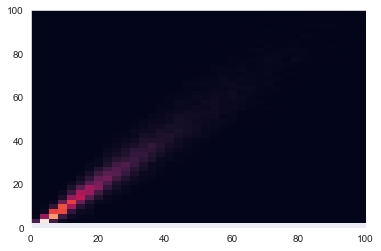

In [31]:
model = Ridge(alpha = 0.1)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
pred = scaler_y.inverse_transform(pred).ravel()
true = y_test

pred = 10 ** pred
true = 10 ** true
print(pred)
print(true)
np.corrcoef(pred, true)[0, 1]


plt.hist2d(pred, true, bins = 450)
plt.xlim(0, 100)
plt.ylim(0, 100)
# plt.scatter(pred, true)
plt.show()


In [ ]:
plt.plot(pred - true)
plt.title("Higher y = Buy me")
plt.ylabel("Pred - True")